In [25]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [26]:
#fetch data and add headers
filepath = 'promise_CM1.csv'
column = ["loc","v(g)","ev(g)","n","v","l","d","i","e","b","t",
          "loCode","loComment","loBlank","locCodeAndComment",
          "uniq_Opnd","total_Op","branchCount","defects"]
df = pd.read_csv(filepath, names=column)

In [27]:
df

,,,loc,v(g),ev(g),n,v,l,d,i,e,b,t,loCode,loComment,loBlank,locCodeAndComment,uniq_Opnd,total_Op,branchCount,defects
1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,0.52,2432.55,2,13,2,0,23.0,46.0,144.0,112.0,5.0,True
24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,0.20,624.53,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,1.05,7838.01,9,59,35,0,32.0,68.0,285.0,190.0,21.0,True
10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,0.05,54.32,1,12,4,0,13.0,13.0,19.0,13.0,3.0,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 498 entries, (1.1, 1.4, 1.4) to (28.0, 6.0, 5.0)
Data columns (total 19 columns):
loc                  498 non-null float64
v(g)                 498 non-null float64
ev(g)                498 non-null float64
n                    498 non-null float64
v                    498 non-null float64
l                    498 non-null float64
d                    498 non-null float64
i                    498 non-null float64
e                    498 non-null float64
b                    498 non-null int64
t                    498 non-null int64
loCode               498 non-null int64
loComment            498 non-null int64
loBlank              498 non-null float64
locCodeAndComment    498 non-null float64
uniq_Opnd            498 non-null float64
total_Op             498 non-null float64
branchCount          498 non-null float64
defects              498 non-null bool
dtypes: bool(1), float64(14), int64(4)
memory usage: 73.2 KB


In [29]:
X = df.iloc[:,0:-1] #features
y = df.iloc[:,-1] #labels

In [30]:
#divide dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
# model for Gausian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

In [32]:
#predict model on test data
predicted = gnb.predict(X_test)

In [33]:
#get accuracy, precision, recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_score = accuracy_score(y_test,predicted)
precision_score = precision_score(y_test,predicted)
recall_score = recall_score(y_test,predicted)
print("Accuracy:",accuracy_score)
print("Precision:",precision_score)
print("Recall:",recall_score)

Accuracy: 0.8484848484848485
Precision: 0.18181818181818182
Recall: 0.1111111111111111


In [34]:
#APPROACH 2 - split data - separate columns into features and labels, then split as 70:30
#X_train, X_test, y_train, y_test = train_test_split(df, defect_encoded, test_size=0.3, random_state=int(time.time()))

#k-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(df):
    X_train, X_test = df.iloc[:,0:-1], df.iloc[:,0:-1]
    y_train, y_test = df.iloc[:,-1], df.iloc[:,-1]

In [35]:
#Create a Gaussian Classifier
gnb2 = GaussianNB().fit(X_train, y_train)

#Predict the response for test dataset
pred = gnb2.predict(X_test)

#get accuracy, precision, recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_score = accuracy_score(y_test,pred)
precision_score = precision_score(y_test,pred)
recall_score = recall_score(y_test,pred)
print("Accuracy:",accuracy_score)
print("Precision:",precision_score)
print("Recall:",recall_score)

Accuracy: 0.857429718875502
Precision: 0.28846153846153844
Recall: 0.30612244897959184


In [36]:
#APPROACH 3 - FEATURE SELECTION (Univariate Selection)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:-1] #features
y = df.iloc[:,-1] #labels

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['metrics','defects']  #naming the dataframe columns
print(featureScores.nlargest(10,'defects'))  #print 10 best features

              metrics       defects
6                   d  2.452055e+06
8                   e  1.362269e+05
2               ev(g)  6.738725e+04
1                v(g)  7.729164e+03
15          uniq_Opnd  4.690829e+03
16           total_Op  3.040284e+03
10                  t  2.454622e+03
14  locCodeAndComment  1.537476e+03
5                   l  1.268298e+03
11             loCode  5.181270e+02


[0.06259923 0.0394523  0.07238066 0.05594926 0.05831236 0.05539049
 0.05028177 0.05252149 0.03815066 0.05959854 0.09225545 0.06625275
 0.00380878 0.0579627  0.07181476 0.05144822 0.05619707 0.05562353]


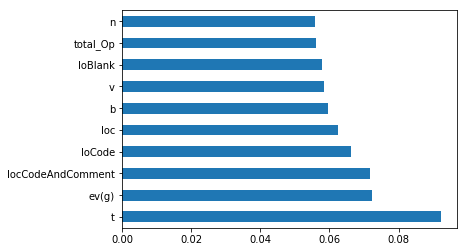

In [37]:
#APPROACH 3 - FEATURE SELECTION (Feature Importance)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [38]:
# from sklearn.naive_bayes import GaussianNB

# features = ["v(g)","l","d","i","e","b",
#            "loCode","loComment","loBlank","uniq_Op"]

# #features = ["e","t","v","n","total_Op","total_Opnd","loComment","loc","uniq_Opnd","i"]

# X = df[features] #features
# y = df.iloc[:,-1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# gnb = GaussianNB().fit(X_train, y_train)

In [39]:
predicted = gnb.predict(X_test)

In [40]:
# #get accuracy, precision, recall
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score

# accuracy_score = accuracy_score(y_test,predicted)
# precision_score = precision_score(y_test,predicted)
# recall_score = recall_score(y_test,predicted)
# print("Accuracy:",accuracy_score)
# print("Precision:",precision_score)
# print("Recall:",recall_score)

In [41]:
from sklearn.feature_selection import VarianceThreshold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

18

In [42]:
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)

X_train.shape, X_test.shape

/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


((333, 18), (165, 18))

In [43]:
# Chi-Squared statistical test

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[1.727e+02 7.729e+03 6.739e+04 1.515e+00 2.087e+02 1.268e+03 2.452e+06
 2.420e+01 1.362e+05 3.771e+01 2.455e+03 5.181e+02 1.867e+00 1.879e+02
 1.537e+03 4.691e+03 3.040e+03 3.477e+02]
[[1.300e+00 1.300e+00 1.300e+00 1.300e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [6.300e+01 3.091e+02 2.937e+03 1.632e+02]
 [4.700e+01 2.155e+02 3.448e+03 1.916e+02]
 [7.200e+01 3.461e+02 6.000e+03 3.333e+02]]


In [44]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))


Num Features: 3


In [45]:
#exhaustive feature selection
#train_features, test_features, train_labels, test_labels
#X_train, X_test, y_train, y_test
import numpy as np
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
           min_features=2,
           max_features=5,
           #scoring='roc_auc',
           scoring='accuracy',
           print_progress=True,
           cv=2)

In [ ]:
features = feature_selector.fit(np.array(X_train.fillna(0)), y_train)

In [47]:
filtered_features= X_train.columns[list(features.k_feature_idx_)]
filtered_features

In [48]:
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train[filtered_features].fillna(0), y_test)

train_pred = clf.predict_proba(X_train[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(y_test, train_pred[:,1])))

test_pred = clf.predict_proba(X_test[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_pred [:,1])))

In [51]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 14)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True  True  True False  True False
  True  True  True  True  True  True]
[1 1 3 1 4 1 1 1 1 2 1 5 1 1 1 1 1 1]


/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [50]:
#no of features
nof_list=np.arange(1,20)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Con

Optimum number of features: 14
Score with 14 features: 0.161023


/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/sanika/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Con